In [23]:
import supercon_dados as tsd
import supercon_funcoes_apoio_ML as tsf
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
import seaborn as sns

In [24]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

In [25]:
X_treino.shape

(17231, 81)

In [26]:
pca = PCA()
pca.fit(X_treino)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.62497239, 0.92268224, 0.97210558, 0.98252944, 0.99127027,
       0.99656129, 0.9980702 , 0.99886409, 0.99929713, 0.99950684,
       0.99965695, 0.99978944, 0.99982995, 0.99986531, 0.99989473,
       0.99991391, 0.99993177, 0.9999455 , 0.99995736, 0.9999655 ,
       0.99997138, 0.99997687, 0.99998044, 0.99998383, 0.99998683,
       0.99998918, 0.99999117, 0.99999275, 0.99999401, 0.99999512,
       0.99999592, 0.99999664, 0.99999714, 0.99999759, 0.99999799,
       0.99999831, 0.99999858, 0.9999988 , 0.99999901, 0.99999917,
       0.99999933, 0.99999945, 0.99999956, 0.99999966, 0.99999973,
       0.9999998 , 0.99999985, 0.99999989, 0.99999992, 0.99999993,
       0.99999995, 0.99999996, 0.99999997, 0.99999998, 0.99999999,
       0.99999999, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [28]:

x = np.arange(0,1,1/1000000)
y = []
for add in x:
    
    d = np.argmax(cumsum>=add)+1
    
    y.append(d)

    
y = np.array(y)

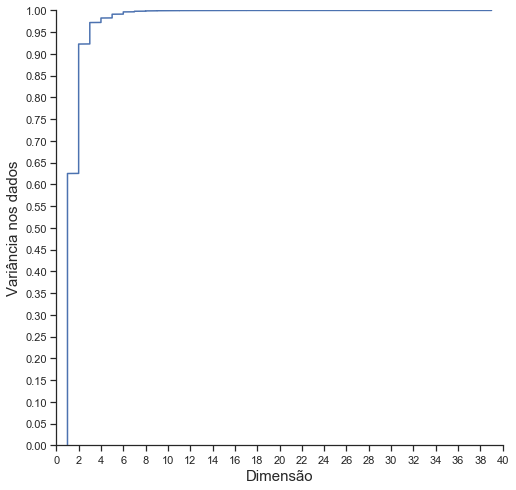

In [29]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 8))

sns.set(style="ticks")
sns.despine()

plt.plot(y, x)

plt.xticks(np.linspace(0, 40, 21, endpoint=True))
plt.yticks(np.linspace(0, 1, 21, endpoint=True))
plt.axis([0,40,0,1])

plt.xlabel('Dimensão',fontsize = 15)
plt.ylabel('Variância nos dados',fontsize = 15)


plt.savefig('PCA_dados', format='png')
plt.show()           # <-- mostra o gráfico

In [9]:
d = np.argmax(cumsum>=0.99)+1
d

5

In [33]:
pca = KernelPCA(n_components=6)

In [34]:
X_treino_reduzido = pca.fit_transform(X_treino)
X_treino_reduzido.shape

(17231, 6)

In [35]:
X_teste_reduzido = pca.fit_transform(X_teste)
X_teste_reduzido.shape

(4308, 6)

In [36]:
lin_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lin_reg.fit(X_treino_reduzido,Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# print('\n Termo independente no modelo linear: \n', lin_reg.intercept_,' \n Coeficientes estimados para o problema de regressão linear: \n ', lin_reg.coef_)

In [38]:
lin_reg.score(X_teste_reduzido,Y_teste)

0.39660623895575764

In [39]:
np.sqrt(mean_squared_error(lin_reg.predict(X_teste_reduzido),Y_teste))

26.505121321289018

In [40]:
ver_grau =[]
ver_resultado =[]

for grau in range(2,5):

    poly = PolynomialFeatures(degree=grau)
    lin_reg = LinearRegression()
    X_poly = poly.fit_transform(X_treino_reduzido)
    lin_reg.fit(X_poly,Y_treino)
    x =  r2_score(Y_teste, lin_reg.predict(poly.fit_transform(X_teste_reduzido)))


    ver_grau.append(grau)
    ver_resultado.append(x)

In [41]:
ver_grau

[2, 3, 4]

In [42]:
ver_resultado

[0.47748432352733516, 0.4461435904419597, -0.3733834318480467]